<a href="https://colab.research.google.com/github/albanda/CE888/blob/master/lab4-recommender/rec_latent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latent Factor Models for Collaborative Filtering

Load required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

Now load the data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/user_ratings.csv")

In [3]:
n_latent_factors = 2

user_ratings = data.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [4]:
latent_item_features

array([[0.126, 0.801],
       [0.561, 0.888],
       [0.528, 0.267],
       [0.79 , 0.617],
       [0.986, 0.246]])

In [5]:
latent_user_preferences

array([[0.556, 0.813],
       [0.573, 0.638],
       [0.776, 0.989],
       [0.166, 0.297],
       [0.457, 0.689],
       [0.369, 0.332],
       [0.248, 0.51 ],
       [0.931, 0.246],
       [0.565, 0.289],
       [0.627, 0.529]])

In [6]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    prediction_rating = predict_rating(user_id, item_id)
    err =  prediction_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id][:]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations=300000):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id][item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10000) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/300000:	MSE=24.634146
Iteration 10000/300000:	MSE=1.469643
Iteration 20000/300000:	MSE=1.310483
Iteration 30000/300000:	MSE=1.275212
Iteration 40000/300000:	MSE=1.244871
Iteration 50000/300000:	MSE=1.226420
Iteration 60000/300000:	MSE=1.216908
Iteration 70000/300000:	MSE=1.211937
Iteration 80000/300000:	MSE=1.209140
Iteration 90000/300000:	MSE=1.207440
Iteration 100000/300000:	MSE=1.206340
Iteration 110000/300000:	MSE=1.205592
Iteration 120000/300000:	MSE=1.205062
Iteration 130000/300000:	MSE=1.204674
Iteration 140000/300000:	MSE=1.204384
Iteration 150000/300000:	MSE=1.204162
Iteration 160000/300000:	MSE=1.203990
Iteration 170000/300000:	MSE=1.203854
Iteration 180000/300000:	MSE=1.203745
Iteration 190000/300000:	MSE=1.203658
Iteration 200000/300000:	MSE=1.203587
Iteration 210000/300000:	MSE=1.203529
Iteration 220000/300000:	MSE=1.203482
Iteration 230000/300000:	MSE=1.203442
Iteration 240000/300000:	MSE=1.203409
Iteration 250000/300000:	MSE=1.203382
Iteration 260000/300000:	

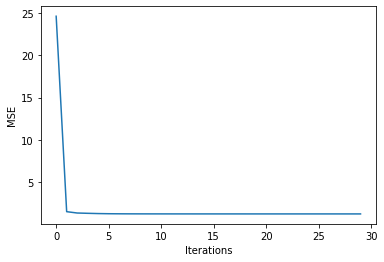

In [7]:
num_iter = 300000
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 10000), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [16]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[  7.204,   1.63 ,  10.876,   4.142,   5.725],
       [  3.531,   2.202, -11.392,   7.574,   5.863],
       [  8.106,   2.28 ,   6.919,   6.424,   7.415],
       [  9.6  ,   2.8  ,   7.001,   8.003,   8.998],
       [  6.53 ,   1.616,   8.207,   4.302,   5.492],
       [  2.846,   0.602,   4.799,   1.469,   2.17 ],
       [  5.257,   1.327,   6.293,   3.567,   4.478],
       [  7.495,   2.477,   2.009,   7.395,   7.657],
       [  2.321,   1.806, -11.755,   6.394,   4.634],
       [  3.988,   0.992,   4.95 ,   2.648,   3.365]])

In [17]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns

In [18]:
comparison_data
# For each data point, the number on the left is the original value from the dataset, the number on the right is the prediction

,The Call of Cthulhu,Frankenstein,Dracula,Neuromancer,Space Odyssey
0,"(8.0, 7.204028564419961)","(2.0, 1.6296958988743127)","(nan, 10.876037065905917)","(5.0, 4.141678056868416)","(4.0, 5.725097563601912)"
1,"(3.0, 3.530852621094688)","(2.0, 2.2021059836041252)","(nan, -11.391582858971232)","(7.0, 7.57421585793349)","(7.0, 5.862568833033404)"
2,"(9.0, 8.106466840796639)","(nan, 2.2802250595551032)","(7.0, 6.9194760647452)","(8.0, 6.424027196692321)","(5.0, 7.414506853966293)"
3,"(nan, 9.599678360837288)","(nan, 2.800397083625027)","(7.0, 7.0006191843208185)","(8.0, 8.003017052291689)","(9.0, 8.998400254354072)"
4,"(nan, 6.530368402043546)","(1.0, 1.6159167047431418)","(8.0, 8.20727245764993)","(3.0, 4.3020192580113195)","(7.0, 5.491647017624669)"
5,"(2.0, 2.845752335457566)","(3.0, 0.6015384070505224)","(5.0, 4.799458735333343)","(nan, 1.4692241589056212)","(nan, 2.1695672544440563)"
6,"(4.0, 5.256645194728681)","(2.0, 1.3270723057023837)","(nan, 6.292684678447511)","(2.0, 3.5669653507870485)","(7.0, 4.477878898355621)"
7,"(7.0, 7.494952025425383)","(1.0, 2.4765484954845753)","(2.0, 2.0085032072492797)","(7.0, 7.394614758261782)","(9.0, 7.657436547122276)"
8,"(3.0, 2.321070432751476)","(3.0, 1.8056344805280264)","(nan, -11.754811024849658)","(7.0, 6.3935698488996175)","(3.0, 4.633693625040771)"
9,"(4.0, 3.98791181340145)","(nan, 0.9919862779535926)","(5.0, 4.950088527025237)","(3.0, 2.6476321486852195)","(3.0, 3.3649013180491036)"
